# IUM projekt - temat 2
### Jakub Grzechociński  
### Piotr Sawicki

## Treść zadania
> Są osoby, które wchodzą na naszą stronę i nie mogą się zdecydować, którym produktom przyjrzeć się nieco lepiej. Może dało by się im coś polecić?

## Definicja problemu biznesowego 

Firma eShopping prowadzi sklep internetowy, w którym klienci mogą przeglądać katalog produktów i dokonywać zakupu. Aby mogło dojść do transakcji kupujący musi znaleźć odpowiedni dla siebie produkt. Jednym z działań, jakie sklep może wykonać, aby zachęcić klienta do kupna produktu, a tym samym zwiększyć dochód ze sprzedaży, jest wspomożenie klienta w wyszukaniu odpowiedniego artykułu lub przedstawienie mu nowej idei na zakup. 

Wspomaganie klienta w zakupie poprzez prezentowanie mu ofert podobnych artykułów do przeglądanego na podstawie kategorii produktów jest zadaniem stosunkowo prostym. Problemem cięższym do rozwiązania jest zagadnienie prezentacji produktów, które podobały się innym kupującym o podobnych zainteresowaniach. System prezentujący kupującemu nowe produkty i skutecznie wzbudzający zainteresowanie klienta tymi produktami przyczyniłby się do zauważalnego wzrostu dochodów ze sprzedaży oraz wpłynąłby na głębsze zainteresowanie serwisem ze strony kupujących. 

Zadaniem niniejszego projektu jest utworzenie systemu, który na podstawie zebranych danych o kliencie oraz odnotowanej aktywności podobnych mu kupujących tworzy propozycje produktów, które mogłyby go zainteresować. Biznesową miarą jakości systemu jest jego skuteczność w doborze przedstawianych produktów określana na podstawie odnotowania przejrzenia strony produktu. 


## Zdefiniowanie zadania modelowania 

Przygotowanie modelu rekomendacyjnego opierającego swoje działanie na odnotowanej historii przeglądania i zakupów produktów przez użytkowników sklepu. 

#### Przygotowane zostaną dwa modele: 

Model opierający swoje działanie wyłącznie na ogólnej popularności produktów, nie uwzględniając informacji o preferencjach innych użytkowników poza danym klientem. Model taki brałby pod uwagę kategorie produktów przeglądanych przez użytkownika i rekomendował najbardziej popularne nieoglądane do tej pory produkty z danych kategorii. Systemy tego typu są proste w implementacji, szybkie w działaniu, a także nietrudno jest opisać ich działanie. Ich wadą jest małe dostosowanie do indywidualnych zainteresowań klienta, a także brak możliwości proponowania produktów spoza odnotowanych kategorii. 

Model biorący pod uwagę przede wszystkim podobieństwa między klientami. Model taki znajdowałby klientów podobnych do danego i rekomendował na podstawie przejrzanych przez nich produktów. System taki może korzystać z “pomysłowości” innych klientów do dokonywania rekomendacji, dzięki czemu mogłyby być prezentowane produkty także z innych kategorii niż te bezpośredniego zainteresowania klienta. Dodatkowo, system taki byłby w stanie wykryć nieznane (w danych) podziały produktów na kategorie. 

## Założenia 

Usługa predykcji udostępniana jest za pomocą mikroserwisu. Żądanie polega na przekazaniu informacji o kliencie oraz jego aktywności, a odpowiedź serwisu zawierać musi N produktów, które należy przedstawić klientowi. 

Model ma w krótkim czasie (max 2 sekund) udzielić odpowiedzi na żądanie wejściowe. Model może dokonywać predykcji wcześniej, na podstawie uprzednio zebranych danych, a na żądanie odpowiadać jedynie poprzez przekazanie utworzonych predykcji. 

Do dyspozycji jest baza danych klientów, ich transakcji oraz produktów oferowanych przez sklep. Dane zebrane są z okresu czasu, na podstawie którego można w konstruktywny sposób przewidywać aktualne zainteresowania. 

 
## Kryteria sukcesu 

Kryterium sukcesu jest stosunek liczby skutecznych rekomendacji do liczby wszystkich zarekomendowanych produktów. Rekomendację uważa się za skuteczną, jeśli na jej skutek użytkownik wszedł na stronę produktu. Model powinien dążyć do maksymalizacji wymienionego kryterium. W modelu testowanym online można przyjąć, że model jest gotowy do pełnowymiarowego wdrożenia, jeśli stosunek skutecznych rekomendacji do wszystkich rekomendacji powinien być co najmniej równy 15%.

 
## Analiza danych 

Dostarczone dane są wystarczające do zrealizowania zadania.  

Kluczowe dane to: 

- historia przeglądania i zakupów `sessions.jsonl` 
- lista produktów i ich kategorii `products.jsonl` 

O ile baza informacji o klientach mogłaby wspomóc dokładność przewidywań modelu, informacje zawarte w users.jsonl nie przyniosłyby znaczącej poprawy działania modelu. Informacje o płci i adresie zamieszkania klienta mogłyby być w ogólnym przypadku przydatne, lecz jako że artykuły oferowane przez sklep dotyczą elektroniki, te informacje nie miałyby szczególnego znaczenia. 

Dane dotyczące historii dostaw również nie wspomogłyby modelu w zauważalnym stopniu, więc nie zostaną wykorzystane. 

Część danych zawiera błędy, w tym: 
- ujemne ceny 
- znacząco zawyżone ceny detaliczne produktów 
- brak danych o produkcie lub użytkowniku w rekordzie wydarzenia sesji 

Błędy dotyczą niedużej części danych. Stwierdzono też, że błędy dotyczące cen produktów są schematyczne w swojej naturze i umożliwiają odzyskanie danych. Większość tych danych poprawiona jest ręcznie.  

Jeśli chodzi o braki danych w zdarzeniach sesji, to te dane da się odzyskać tylko częściowo. Większość brakujących danych dotyczących użytkowników (`user_id`) sesji da się odzyskać na podstawie numeru sesji. Rekordy, w których nie da się odzyskać danych nie będą brane pod uwagę w czasie trenowania modeli. Usunięte rekordy stanowią około 5.2% wszystkich rekordów zawartych w `sessions.jsonl`. 

Wartość informacji wzajemnej między zmiennymi wskazującymi braki dla atrybutów `user_id` i `product_id` z pozostałymi atrybutami nie przekracza 0.036. Maksymalna wartość informacji wzajemnej zachodzi dla `timestamp` zaokrąglonego do 10 minut. Jest to niewielka wartość biorąc pod uwagę, że przy informacji wzajemnej wartość timestamp jest traktowana jako rzadka zmienna dyskretna. Dla pozostałych atrubutów wartość informacji wzajemnej jest jeszcze znaczniej bliższa zeru, co sugeruje, że braki danych w obu atrybutach są całkowicie losowe, a więc usunięcie rekordów z brakami danych nie wpłynie negatywnie na jakość modeli. 

W zbiorze danych sesji nie występują produkty niezdefiniowane w zbiorze produktów. W chwili obecnej zakłada się, że tego typu luk nie będzie również w przyszłości. 

Z punktu widzenia modelu rekomendacji danych nie ma zbyt dużo. W szczególności znaczącą ilość informacji wniosłyby dokładniejsze podziały produktów na podkategorie lub atrybuty.  

Na przykład:
- rodzaje matrycy, rozdzielczości, przekątne monitorów 
- typy gry, kategorie wiekowe gier 

Ponad to, zaawansowane systemy rekomendacji opierają swoje działanie często na systemie ocen produktów, a nie tylko na wyświetleniach i zakupach produktów. 

Wymienione wyżej czynniki wskazują, że zastosowanie skomplikowanego modelu uczenia maszynowego raczej nie dałoby zauważalnie lepszych rezultatów od prostych modeli statystycznych. 

Ponad to, zauważono, że macierz sąsiedztwa przeglądań produktów (użytkownik-przejrzał-produkt) jest bardzo gęsta (współczynnik gęstości 76%), co dodatkowo zwiększa skuteczność działania modeli statystycznych względem modeli opartych np. na grafowych sieciach neuronowych. 

 
## Analityczne kryterium sukcesu a realia projektowe (modelowanie offline) 

Jako że modele uczone i testowane są na podstawie danych offline ciężko jest stwierdzić, jak modele sprawdziłyby się w rzeczywistych warunkach. W szczególności, ze względu na brak możliwości sprawdzenia, czy dokładnie sprecyzowane kryterium biznesowe zostałoby spełnione, nie zawarliśmy informacji o takim kryterium w powyższej części dokumentu. 

Dla kompletności można jednak sformułować pewne realistyczne, konkretne biznesowe kryterium sukcesu. Na przykład: 

> W wyniku wprowadzenia systemu predykcji do funkcjonalności sklepu ilość przejrzeń stron produktów musi wzrosnąć o minimum 10%, aby system był opłacalny. 

Na podstawie otrzymanych danych 10% wzrost to nie mniej niż 115 więcej przejrzeń dziennie.

### Obliczenia oraz dogłębna analiza danych i ich użyteczności
Poniżej znajdują się obliczenia, na których oparte zostały wartości liczbowe z powyższego raportu. Wszystkie obliczenia dotyczą bazy rekordów wydarzeń sesji.

In [13]:
import datetime
import numpy as np
import pandas as pd

data_raw_dir = 'data_raw/'
data_dir = 'data/'
sessions_file = 'sessions.jsonl'
products_file = 'products.jsonl'
users_file = 'users.jsonl'
sessions_raw_filepath = data_raw_dir + sessions_file
sessions_filepath = data_dir + sessions_file
products_filepath = data_dir + products_file
users_filepath = data_raw_dir + users_file

In [14]:
# Dane wydarzeń sesji
sessions_raw_data = pd.read_json(sessions_raw_filepath, convert_dates=False, lines=True)
sessions_raw_data

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,100001,2021-03-19T12:13:34,102.0,1061.0,VIEW_PRODUCT,0,NaN
1,100001,2021-03-19T12:15:33,102.0,NaN,VIEW_PRODUCT,0,NaN
2,100001,2021-03-19T12:19:18,102.0,1099.0,VIEW_PRODUCT,0,NaN
3,100001,2021-03-19T12:19:47,102.0,1144.0,VIEW_PRODUCT,0,NaN
4,100001,2021-03-19T12:21:59,102.0,1054.0,VIEW_PRODUCT,0,NaN
...,...,...,...,...,...,...,...
190640,110659,2021-03-11T13:14:17,302.0,1120.0,VIEW_PRODUCT,0,NaN
190641,110659,2021-03-11T13:14:17,302.0,1119.0,VIEW_PRODUCT,0,NaN
190642,110659,2021-03-11T13:14:17,302.0,1131.0,VIEW_PRODUCT,0,NaN
190643,110659,2021-03-11T13:14:17,302.0,1135.0,VIEW_PRODUCT,0,NaN


#### Informacja wzajemna zmiennych wskaźnikowych atrybutów z brakami danych

In [32]:
import datetime
from sklearn.metrics import mutual_info_score

def calc_mutual_information(data_original: pd.DataFrame, column: str) -> (float, str):
    data = data_original.copy()
    column_ptr = column + '_ptr'
    data.insert(len(data.columns), column_ptr, 0)
    data.loc[data[column].isnull(), column_ptr] = 1

    max_mi = 0
    for data_column in data.columns:
        if data_column != column and data_column != column_ptr:
            compare_with = data[data_column]
            if data_column == 'timestamp':
                # Round timestamp to 10 minute periods
                compare_with = compare_with.str[:-4]
            if data_column == 'event_type':
                compare_with = compare_with.transform(lambda x: ord(x[0]))
            compare_with = compare_with.fillna(-1)
            mi = mutual_info_score(data[column_ptr], compare_with)
            if mi > max_mi:
                max_mi = mi
                max_column = data_column
    return max_mi, max_column

mutual_information_user_id, mutual_column_user_id = calc_mutual_information(sessions_raw_data, 'user_id')
mutual_information_product_id, mutual_column_product_id = calc_mutual_information(sessions_raw_data, 'product_id')
print("Największa wartość informacji wzajemnej dla zmiennej wskaźnikowej atrybutu:")
print(f' - user_id: {mutual_information_user_id:.4f} dla kolumny {mutual_column_user_id}')
print(f' - product_id: {mutual_information_product_id:.4f} dla kolumny {mutual_column_product_id}')

Największa wartość informacji wzajemnej dla zmiennej wskaźnikowej atrybutu:
 - user_id: 0.0357 dla kolumny timestamp
 - product_id: 0.0350 dla kolumny timestamp


#### Liczba błędnych wierszy w bazie rekordów sesji

In [4]:
row_num_pre_drop = len(sessions_raw_data.index)
print('Liczba wierszy przed usunięciem błędnych danych: ', row_num_pre_drop)

data_cleaned = pd.read_json(sessions_filepath, lines=True)
row_num_after_drop = len(data_cleaned.index)
print('Liczba wierszy po odzyskaniu i usunięciu błędnych danych: ', row_num_after_drop)

fraction_lost = (row_num_pre_drop - row_num_after_drop) / row_num_pre_drop
print('Usuniętych danych: {:.2%}'.format(fraction_lost))

Liczba wierszy przed usunięciem błędnych danych:  190645
Liczba wierszy po odzyskaniu i usunięciu błędnych danych:  181258
Usuniętych danych: 4.92%


#### Średnia liczba przejrzeń produktów dziennie
Wliczane są uszkodzone rekordy, tzn. również te, w których brakuje części danych.

In [5]:
# Ilość wyświetleń na dzień
view_event_timestamps = sessions_raw_data[sessions_raw_data['event_type']=='VIEW_PRODUCT']['timestamp']
view_events_per_day = (pd.to_datetime(view_event_timestamps)
    .dt.floor('d')
    .value_counts()
    .rename_axis('day')
    .reset_index(name='count')
    .sort_values('day'))
view_events_per_day

,day,count
59,2021-01-01,1892
5,2021-01-02,2518
64,2021-01-03,1820
85,2021-01-04,1556
41,2021-01-05,2060
...,...,...
78,2021-03-28,1668
37,2021-03-29,2095
51,2021-03-30,1986
63,2021-03-31,1838


In [6]:
# Średnia liczba wyświetleń na dzień
mean_view_events_per_day = view_events_per_day['count'][:-1].mean()
round(mean_view_events_per_day)

2038

Stąd wynika, że wzrost wyświetleń o 10% to około 115 wyświetleń (zaokrąglając w górę).

#### Gęstość macierzy sąsiedztwa (adjacency matrix)

In [7]:
# Załadowanie wyczyszczonych danych sesji
sessions_data = pd.read_json(sessions_filepath, lines=True)
# Podział rekordów na rekordy dotyczące VIEW oraz BUY
views_data = sessions_data[sessions_data['event_type'].str.contains('VIEW_PRODUCT')]
buy_data = sessions_data[sessions_data['event_type'].str.contains('BUY_PRODUCT')]

In [8]:
# Macierze sąsiedztwa (z uwzględnieniem liczby przejrzeń i zakupów)
view_adjacency_matrix = pd.crosstab(views_data['user_id'], views_data['product_id'])
buy_adjacency_matrix = pd.crosstab(buy_data['user_id'], buy_data['product_id'])

In [9]:
def get_uniques(df, column_name) -> set:
    uniques = df[column_name].unique()
    uniques.sort()
    uniques = set(uniques)
    return uniques
    
# Liczba unikalnych użytkowników i produktów w danych sesji
items_in_sessions = get_uniques(sessions_data, 'product_id')
users_in_sessions = get_uniques(sessions_data, 'user_id')

In [10]:
total_possible_links = len(items_in_sessions)*len(users_in_sessions)

# Obliczanie gęstości VIEW
links_in_view_adjacency_matrix = view_adjacency_matrix.astype(bool).sum(axis=0).sum(axis=0)
view_density = links_in_view_adjacency_matrix / total_possible_links
# Obliczanie gęstości BUY
links_in_buy_adjacency_matrix = buy_adjacency_matrix.astype(bool).sum(axis=0).sum(axis=0)
buy_density = links_in_buy_adjacency_matrix / total_possible_links

print("View density: {:.3%}".format(view_density))
print("Buy density: {:.3%}".format(buy_density))

View density: 89.598%
Buy density: 3.558%


#### Rozkład kategorii produktów w danych sesji

In [11]:
# Załadowanie wyczyszczonych danych sesji i produktów
sessions_data = pd.read_json(sessions_filepath, lines=True)
products_data = pd.read_json(products_filepath, lines=True)

In [12]:
# Złączenie danych sesji i produktów
session_join_products = sessions_data.join(products_data.set_index('product_id'), on='product_id', how='left')
session_join_products = session_join_products[['session_id', 'user_id', 'event_type', 'category_path']]
session_join_products

,session_id,user_id,event_type,category_path
0,100001,102,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
1,100001,102,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
2,100001,102,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
3,100001,102,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
4,100001,102,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
...,...,...,...,...
181253,110659,302,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
181254,110659,302,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
181255,110659,302,VIEW_PRODUCT,Gry i konsole;Gry komputerowe
181256,110659,302,VIEW_PRODUCT,Gry i konsole;Gry komputerowe


In [13]:
# Udział poszczególnych kategorii w danych sesji
category_counts = session_join_products['category_path'].value_counts()
categories_as_fractions_of_data_count = category_counts / len(session_join_products)
categories_as_fractions_of_data_count

Gry i konsole;Gry komputerowe                                     0.480315
Gry i konsole;Gry na konsole;Gry Xbox 360                         0.166001
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                0.153290
Komputery;Monitory;Monitory LCD                                   0.092167
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne    0.054723
Gry i konsole;Gry na konsole;Gry PlayStation3                     0.053504
Name: category_path, dtype: float64

<AxesSubplot:>

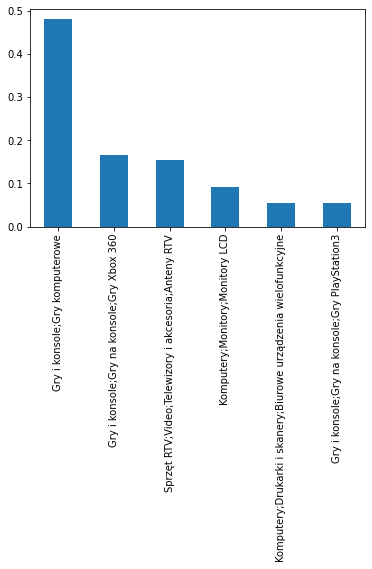

In [14]:
import matplotlib
categories_as_fractions_of_data_count.plot(kind='bar')

Dla porównania rozkład produktów:

<AxesSubplot:>

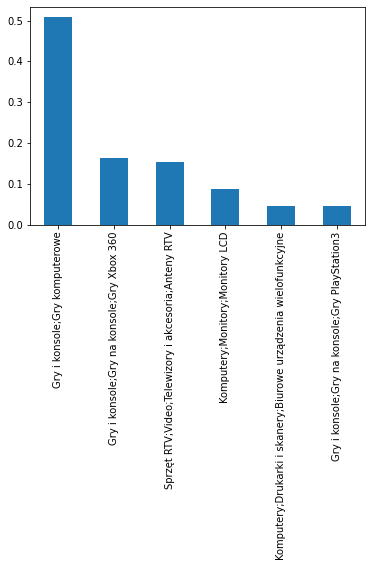

In [15]:
category_counts = products_data['category_path'].value_counts()
categories_as_fractions_of_data_count = category_counts / len(products_data)
categories_as_fractions_of_data_count.plot(kind='bar')

Wykresy są dość podobne. W obu dominują gry komputerowe i w obu ogólny rozkład jest taki sam. Dane sesji wyglądają więc realistycznie - klienci sklepu są zainteresowani pełną gamą produktów w stopniu, w jakim występują w sklepie.  
Tego typu analizę można by kontynuować, zgłębiając się coraz bardziej w szczegóły. Dla zachowania porządku analiza rozkładów w tym dokumencie kończy się na tych dwóch najistotniejszych rozkładach.

#### Zależność danych od siebie
Sprawdzenie, czy rekordy sesji są względem siebie zależne. Taka zależność, porównana do rozkładu losowego, pozwoli stwierdzić czy w danych przechowana jest jakaś informacja. Jeśli w danych jest zawarta informacja to można na ich podstawie wnioskować - tworzyć modele predykcyjne.

Wykonane jest proste badanie zależności - prawdopodobieństwo, że następny obejrzany obiekt obejrzany przez użytkownika jest z tej samej kategorii co poprzedni.

In [16]:
def calculate_view_product_category_coherency(sessions_with_categories: pd.DataFrame) -> float:
    view_sessions_with_categories = sessions_with_categories[session_join_products['event_type']=='VIEW_PRODUCT']
    users_in_sessions = get_uniques(view_sessions_with_categories, 'user_id')

    same_category_count = 0
    for user in users_in_sessions:
        user_sessions = view_sessions_with_categories[view_sessions_with_categories['user_id']==user]
        prev_row = None
        for _, row in user_sessions.iterrows():
            if prev_row is not None and prev_row['category_path'] == row['category_path']:
                same_category_count += 1
            prev_row = row
    return same_category_count / len(view_sessions_with_categories)

calculate_view_product_category_coherency(session_join_products)

0.9500815344440263

Dla porównania wartości wyliczone tą samą metodą dla losowo wygenerowanych sesji:

In [17]:
def generate_random_sessions(users_data: pd.DataFrame, products_data: pd.DataFrame, df_length: int) -> pd.DataFrame:
    # Getting a list of categories this way preserves the counts of categories
    product_categories = products_data['category_path']
    # Getting the list of users the same way gives unique values since the values in the column are unique
    users = users_data['user_id']
    
    session_users_col = np.random.choice(users, df_length)
    session_categories_col = np.random.choice(product_categories, df_length)
    # We don't need anything else, really

    fake_sessions = {'user_id': session_users_col, 'category_path': session_categories_col}
    fake_sessions = pd.DataFrame(fake_sessions)
    return fake_sessions
    
users_data = pd.read_json(users_filepath, lines=True)
for _ in range(5):
    fake_sessions = generate_random_sessions(users_data, products_data, len(session_join_products))
    product_category_coherency = calculate_view_product_category_coherency(fake_sessions)
    print(product_category_coherency)

0.31942686417387933
0.31615408299408165
0.3186115197336161
0.3190733581927862
0.3171404787155189


Na podstawie porównania różnic otrzymanych wartości można wnioskować, że w danych jest pewna zależność i nie składają się wyłącznie z losowego szumu. Na postawie tego stwierdzenia można uznawać, że model uczenia maszynowego jest w stanie wnioskować na podstawie zadanych danych.

Dodatkowo: zbadanie zależności zakupu od przeglądanych produktów  
Badane jest prawdopodobieństwo, że zakupiony produkt jest z tej samej kategorii co wcześniej obejrzany.

In [18]:
def calculate_view_to_buy_product_category_coherency(sessions_with_categories: pd.DataFrame) -> float:
    users_in_sessions = get_uniques(sessions_with_categories, 'user_id')

    same_category_count = 0
    all_counted = 0
    for user in users_in_sessions:
        user_sessions = sessions_with_categories[sessions_with_categories['user_id']==user]
        prev_row = None
        for _, row in user_sessions.iterrows():
            if row['event_type'] == "BUY_PRODUCT" and prev_row is not None:
                if prev_row['category_path'] == row['category_path']:
                    same_category_count += 1
                all_counted += 1
            prev_row = row
    return same_category_count / all_counted

calculate_view_to_buy_product_category_coherency(session_join_products)

1.0

Zależność jest silna (bliska 100%). Wykonanie testu na danych losowych dałoby taki sam wynik jak w teście poprzednim, a więc około 0.425.  
Uzyskany wynik wskazuje, że na podstawie danych zakupu również można wnioskować.